<a href="https://colab.research.google.com/github/Priyankaw120/Student-Performance-Predictor/blob/main/StudentPerformance_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Setup & imports
!pip install -q seaborn scikit-learn   # Colab usually has these, but safe to run
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
df = pd.read_csv('/content/StudentsPerformance.csv')
df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
print("Rows, Columns:", df.shape)
print("\nColumns:\n", df.columns.tolist())
display(df.info())
display(df.describe(include='all').T)
print("\nMissing values per column:\n", df.isnull().sum())


Rows, Columns: (1000, 8)

Columns:
 ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course', 'math score', 'reading score', 'writing score']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


None

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
gender,1000,2,female,518,NaN,NaN,NaN,NaN,NaN,NaN,NaN
race/ethnicity,1000,5,group C,319,NaN,NaN,NaN,NaN,NaN,NaN,NaN
parental level of education,1000,6,some college,226,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lunch,1000,2,standard,645,NaN,NaN,NaN,NaN,NaN,NaN,NaN
test preparation course,1000,2,none,642,NaN,NaN,NaN,NaN,NaN,NaN,NaN
math score,1000.0,NaN,NaN,NaN,66.089,15.16308,0.0,57.0,66.0,77.0,100.0
reading score,1000.0,NaN,NaN,NaN,69.169,14.600192,17.0,59.0,70.0,79.0,100.0
writing score,1000.0,NaN,NaN,NaN,68.054,15.195657,10.0,57.75,69.0,79.0,100.0



Missing values per column:
 gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


In [5]:
# Create average score and binary target
df['average_score'] = df[['math score','reading score','writing score']].mean(axis=1)
df['result'] = (df['average_score'] >= 50).astype(int)  # 1 = Pass, 0 = Fail
df[['math score','reading score','writing score','average_score','result']].head()


,math score,reading score,writing score,average_score,result
0,72,72,74,72.666667,1
1,69,90,88,82.333333,1
2,90,95,93,92.666667,1
3,47,57,44,49.333333,0
4,76,78,75,76.333333,1


In [6]:
# strip whitespace and lowercase strings
for col in df.select_dtypes('object').columns:
    df[col] = df[col].astype(str).str.strip()

# drop duplicates (if any)
print("Duplicates before:", df.duplicated().sum())
df = df.drop_duplicates()
print("Duplicates after:", df.duplicated().sum())

# check again missing
df.isnull().sum()


Duplicates before: 0
Duplicates after: 0


,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0
average_score,0
result,0


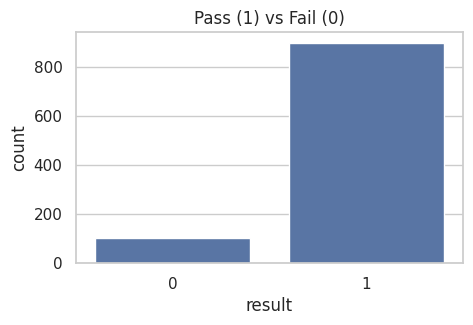

In [7]:
# 1. Pass vs Fail distribution
plt.figure(figsize=(5,3))
sns.countplot(x='result', data=df)
plt.title('Pass (1) vs Fail (0)')
plt.show()


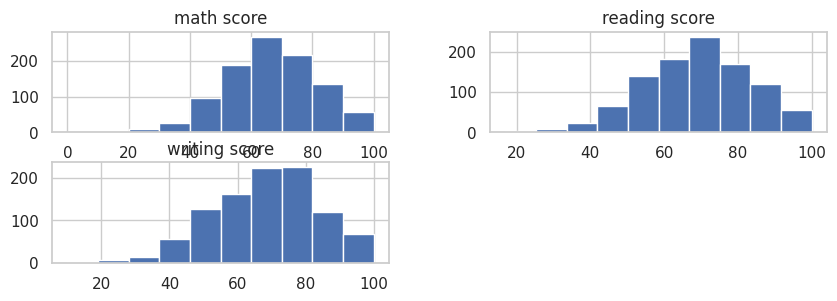

In [8]:
# 2. Score distributions
df[['math score','reading score','writing score']].hist(figsize=(10,3))
plt.show()


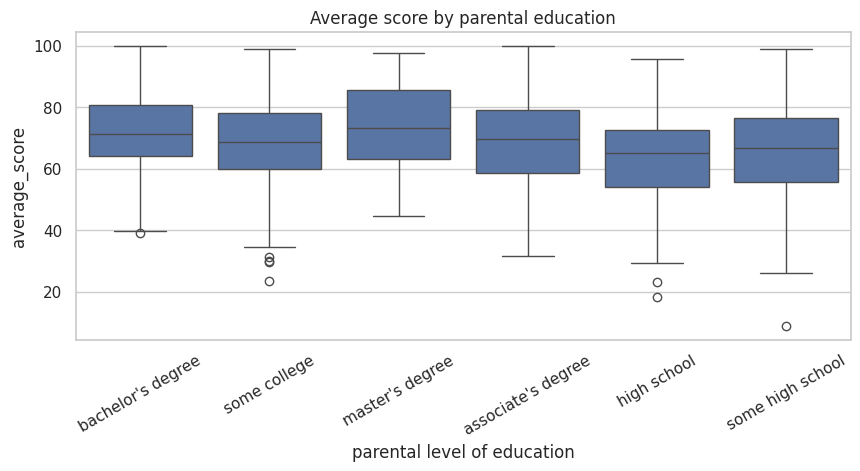

In [9]:
# 3. Parental education vs average score
plt.figure(figsize=(10,4))
sns.boxplot(x='parental level of education', y='average_score', data=df)
plt.xticks(rotation=30)
plt.title('Average score by parental education')
plt.show()


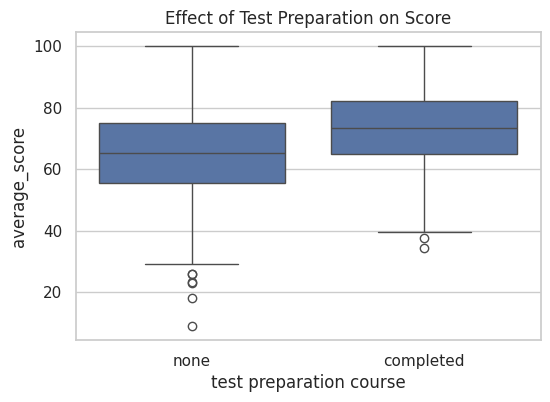

In [10]:
# 4. Test preparation course
plt.figure(figsize=(6,4))
sns.boxplot(x='test preparation course', y='average_score', data=df)
plt.title('Effect of Test Preparation on Score')
plt.show()


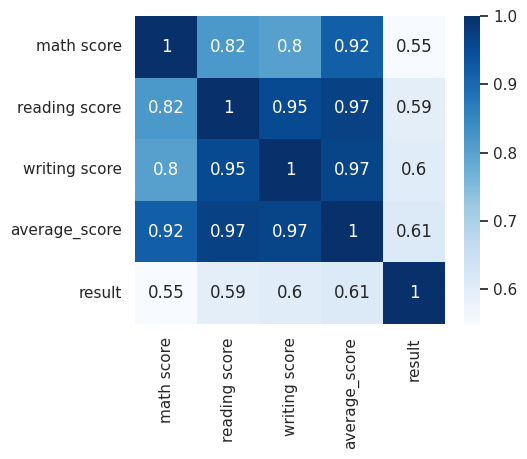

In [11]:
# 5. Correlation heatmap for numeric columns
plt.figure(figsize=(5,4))
sns.heatmap(df[['math score','reading score','writing score','average_score','result']].corr(), annot=True, cmap='Blues')
plt.show()


In [12]:
# Quick label encoding for categorical strings (explain this is simple/fast)
le = LabelEncoder()
df_enc = df.copy()
for col in df_enc.select_dtypes('object').columns:
    df_enc[col+'_enc'] = le.fit_transform(df_enc[col])

# drop original categorical columns if you prefer
# keep the numeric score columns and the new enc columns
display(df_enc.head())


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average_score,result,gender_enc,race/ethnicity_enc,parental level of education_enc,lunch_enc,test preparation course_enc
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,1,0,1,1,1,1
1,female,group C,some college,standard,completed,69,90,88,82.333333,1,0,2,4,1,0
2,female,group B,master's degree,standard,none,90,95,93,92.666667,1,0,1,3,1,1
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,0,1,0,0,0,1
4,male,group C,some college,standard,none,76,78,75,76.333333,1,1,2,4,1,1


In [13]:
# Example feature list (adjust based on encoded columns names):
features = ['math score', 'reading score', 'writing score',
            'gender_enc', 'race/ethnicity_enc', 'parental level of education_enc',
            'lunch_enc', 'test preparation course_enc']

# ensure these columns exist - if not, print df_enc.columns and adjust
X = df_enc[features]
y = df_enc['result']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42, stratify=y)
print("Train shape:", X_train.shape, "Test shape:", X_test.shape)


Train shape: (800, 8) Test shape: (200, 8)


Decision Tree Accuracy: 0.99
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        21
           1       1.00      0.99      0.99       179

    accuracy                           0.99       200
   macro avg       0.96      0.99      0.97       200
weighted avg       0.99      0.99      0.99       200



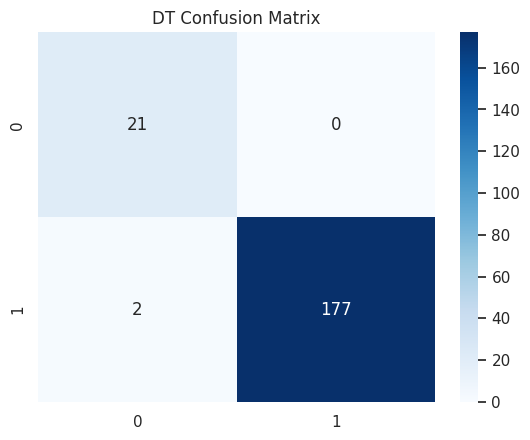

In [14]:
dt = DecisionTreeClassifier(max_depth=4, random_state=42)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('DT Confusion Matrix')
plt.show()


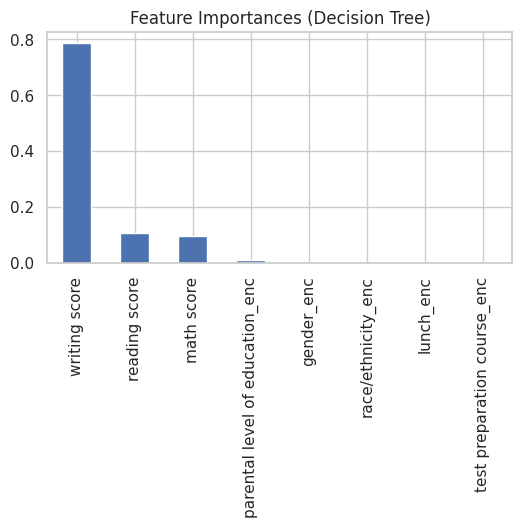

writing score                      0.786706
reading score                      0.106772
math score                         0.097126
parental level of education_enc    0.009396
gender_enc                         0.000000
race/ethnicity_enc                 0.000000
lunch_enc                          0.000000
test preparation course_enc        0.000000
dtype: float64


In [15]:
importances = pd.Series(dt.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(6,3))
importances.plot(kind='bar')
plt.title('Feature Importances (Decision Tree)')
plt.show()
print(importances)


In [16]:
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_s, y_train)
y_pred_lr = lr.predict(X_test_s)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


Logistic Regression Accuracy: 0.995
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        21
           1       0.99      1.00      1.00       179

    accuracy                           0.99       200
   macro avg       1.00      0.98      0.99       200
weighted avg       1.00      0.99      0.99       200



In [17]:
print("Final Decision Tree accuracy:", round(accuracy_score(y_test, y_pred)*100,2), "%")
print("Final Logistic Regression accuracy:", round(accuracy_score(y_test, y_pred_lr)*100,2), "%")


Final Decision Tree accuracy: 99.0 %
Final Logistic Regression accuracy: 99.5 %
